In [48]:
# keras module and matplotlib

from keras.applications.resnet50 import ResNet50 
from keras.preprocessing import image 
from keras.applications.resnet50 import preprocess_input
from keras.models import load_model
import numpy as np
import keras_resnet
import pickle
import os, sys

### keras for training
from keras.backend import tf as ktf
from keras.regularizers import l2
import h5py

# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model

### Mixed model
# import the necessary packages
from keras.layers.core import Dense
from keras.models import Model
from keras.optimizers import Adam

## Image Hash
import imagehash



# hash and similarity function
import imagehash
import skimage.measure  as ssim
from numbers import Number
import random

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
from scipy import sum, average
from scipy.spatial.distance import directed_hausdorff

# get working directory
cwd = os.getcwd() # current working directory
sys.path.append(cwd)

## reload
%load_ext autoreload
%autoreload 2

## similarity measure
from utils import index_query, plot_results
from utils import ssims, simHash, ssims2 
from utils import find_query_l2, find_query_ssim2, find_query_ssim3, find_query


from utils import find_query_hash, find_query_ssim, find_query_l2raw

# Plots inline
%matplotlib inline



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# cnn model 
cnn_model = ResNet50(weights='imagenet',include_top=False,pooling="avg")
cnn_model2 = ResNet50(weights='imagenet',include_top=False)


/home/cat/anaconda3/envs/cat/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [11]:
# index to images and their vector output
with open('search_directory.pkl', 'rb') as f:
    search_directory = pickle.load(f)

In [12]:
# train input
with open('train_input_1.pkl', 'rb') as f:
    train_input_1 = pickle.load(f)

In [13]:
# target variable
with open('score_list.pkl', 'rb') as f:
    score_list = pickle.load(f)

In [ ]:
## load train and validation set for model training
train = np.load('train.npy')
target= np.load('target.npy')
train_v = np.load('train_v.npy')
target_v = np.load('target_v.npy')

In [14]:
# load the index file for testing
# If this does not load one needs to save the file
# scroll down to load_save images 
# run the cell with sear_list/ data_file
with open('search_index.pkl', 'rb') as f:
    indexes = pickle.load(f)

In [15]:
# load prediction model
model1 = load_model('my_model.h5') 


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


# Image Retrieval   

### Test Image Model
Randomly selected from internet

(1, 224, 224, 3)
(1, 2048)
(2048,)


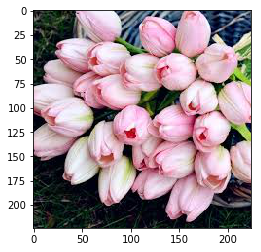

In [24]:
query_index,img,x = index_query('test2.jpg',cnn_model)

## Similarity Measure on Feature Space
In this second instance, the similarity measure is applied on the output of a neaural network


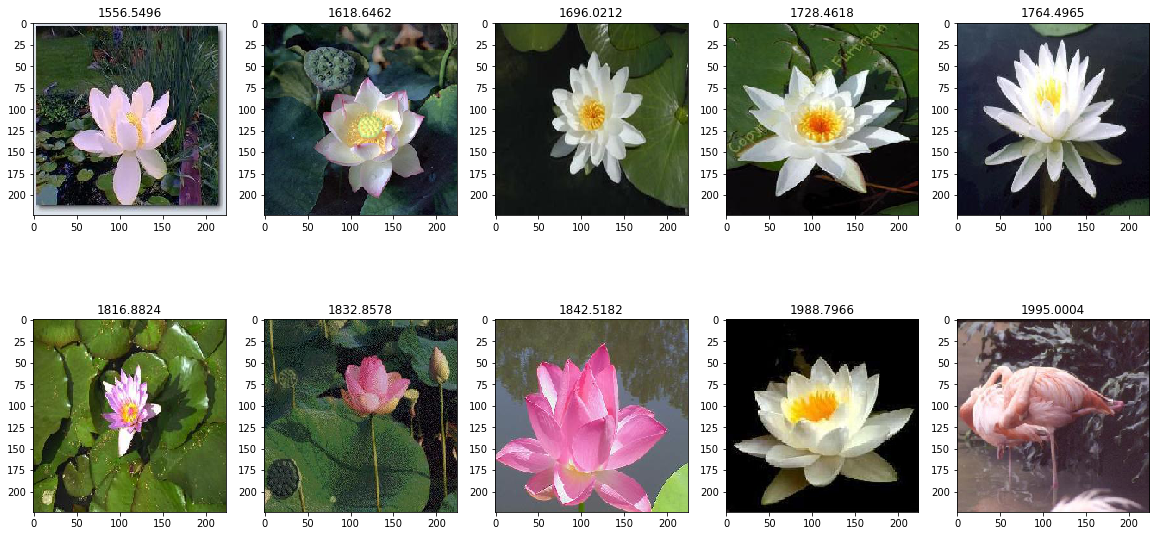

In [25]:
results = find_query_l2(query_index, indexes, 10)
plot_results(results)

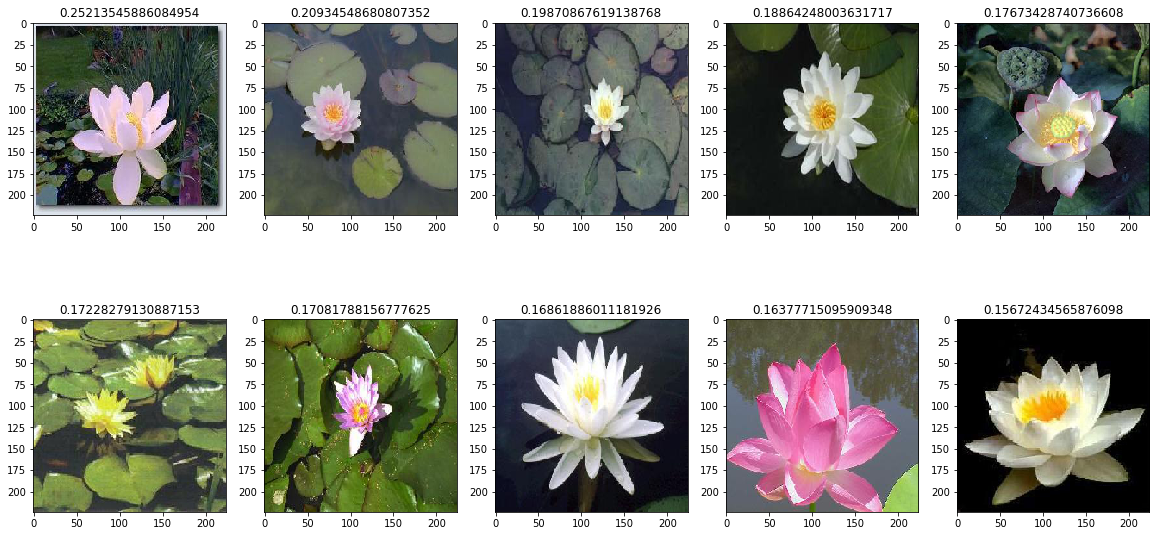

In [26]:
results = find_query_ssim2(query_index, indexes, 10)
plot_results(results)

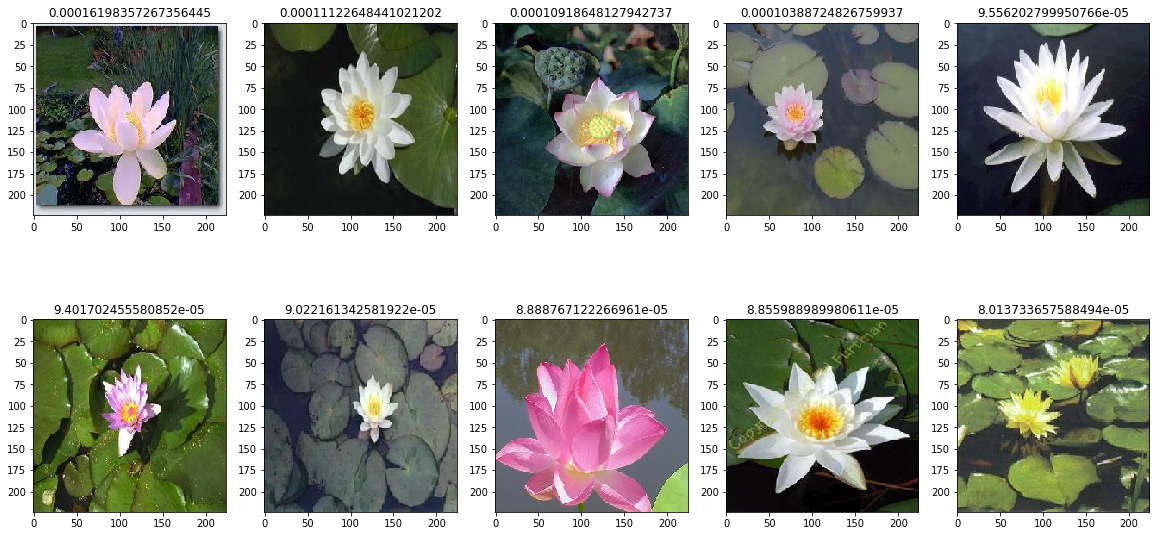

In [27]:
results = find_query_ssim3(query_index,indexes, 10)
plot_results(results)

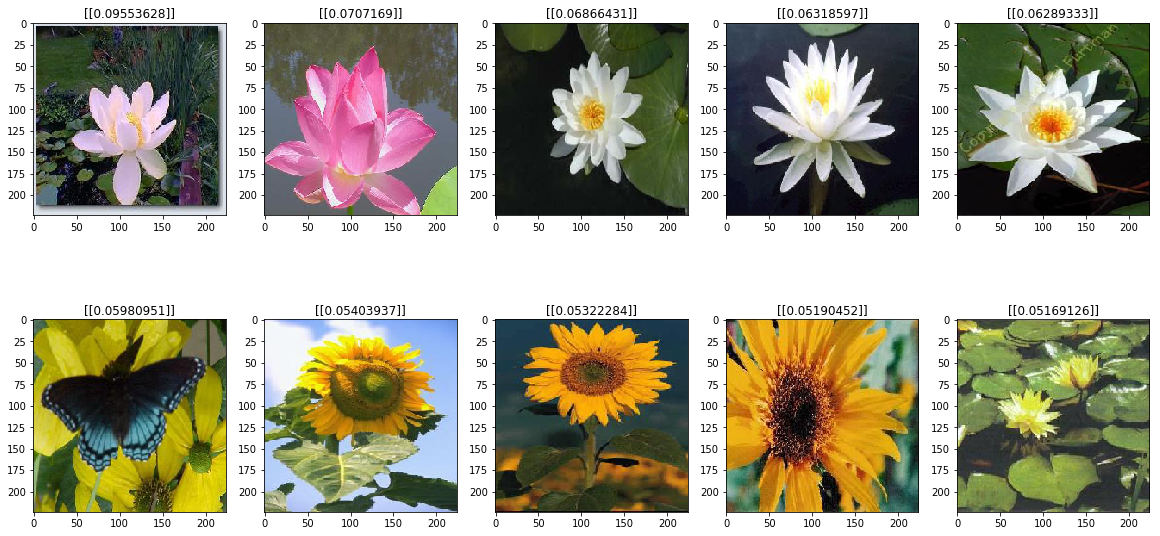

In [107]:
results = find_query(query_index,model, indexes, 10)
plot_results(results)

## Aim : To show Using metric or non-metric similarity measure on  Image directly fails 

Note the bad retrieved results when the image was not preprocessed

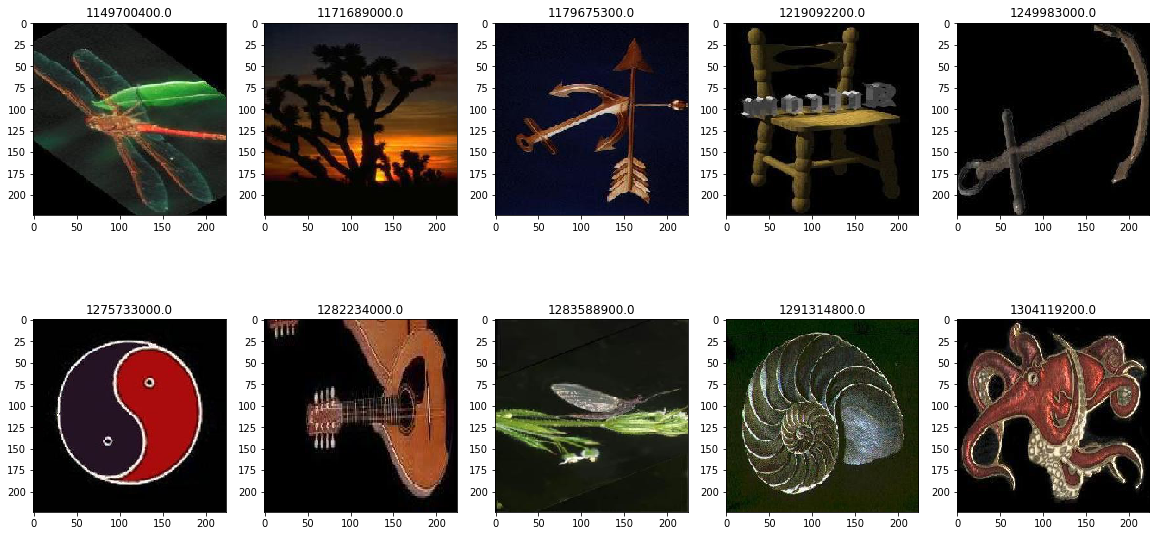

In [30]:
results = find_query_l2raw(x, indexes, 10)
plot_results(results)

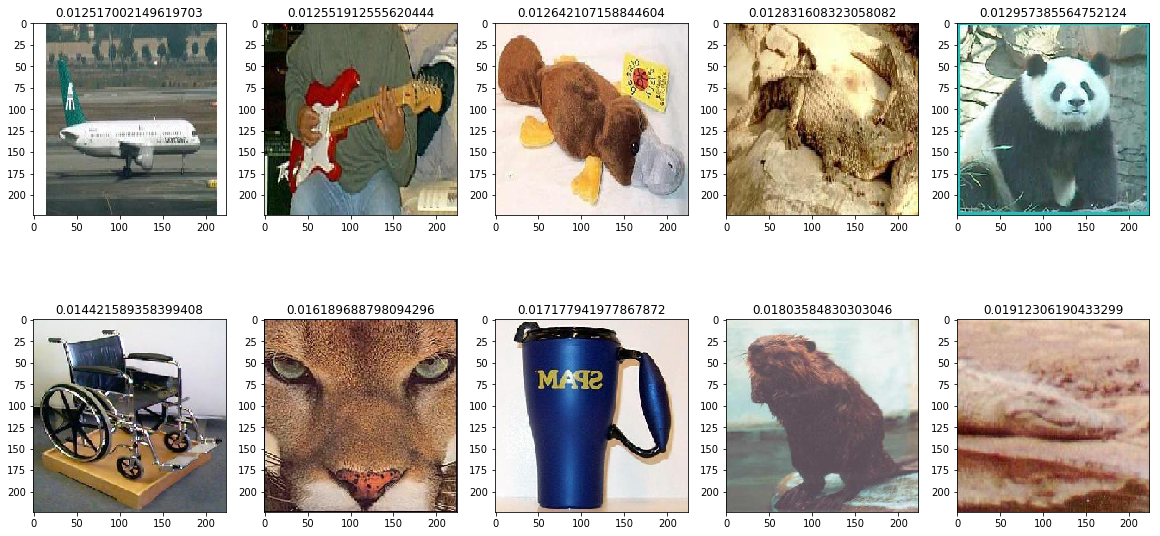

In [31]:
results = find_query_ssim(x, indexes, 10)
plot_results(results)

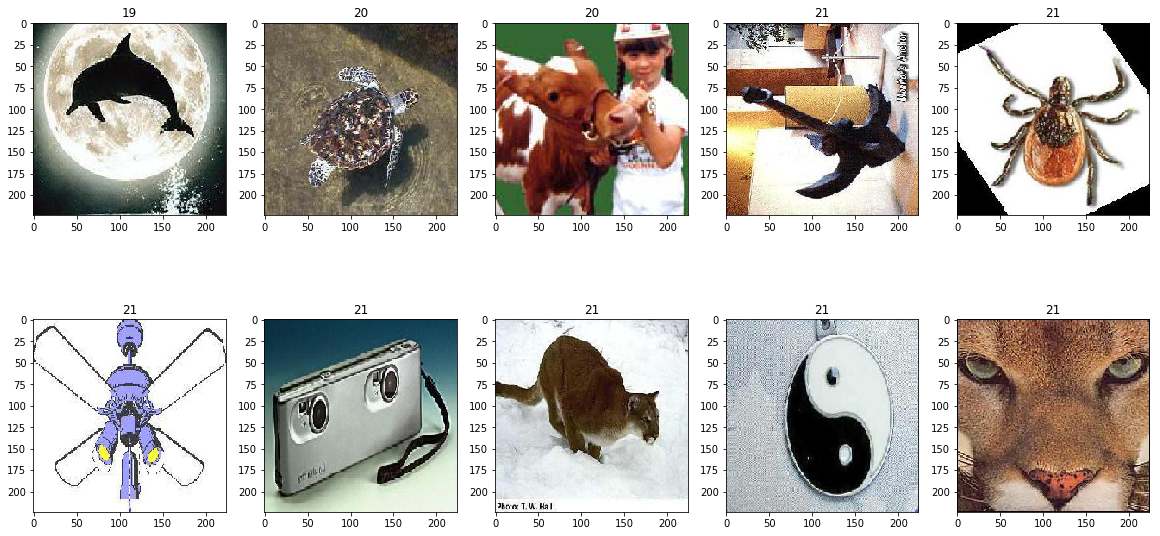

In [32]:
results = find_query_hash(img, indexes, 10)
plot_results(results)

### Load and save Images 

##### Get the directory of the images
`Don't run this section . Use the pickle file instead`

This is more efficient than storing the images directly

In [308]:
# save and load data directories 
### No need to run this again. Just use the data file zip file
import os
data_directory=[]
rootdir=os.walk('101_ObjectCategories/')
save_path= os.getcwd()+ '/data_file/'
image_amount = 100
for subd in rootdir :
    #print(subd[1])
    j=0
    for name in subd[1]:
        i = 0
        for filename in glob.glob('101_ObjectCategories/'+name+'/*.jpg'):
            if i < image_amount:
                data_directory.append(filename)
                i+=1;

In [316]:
search_directory = []
for filename in data_directory: #assuming gif
    #print(filename)
    #im=Image.open(filename)
    img = image.load_img(filename, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    query = cnn_model.predict(x)
    query = query.flatten()
    search_directory.append((filename,query))

In [318]:
with open('search_directory.pkl', 'wb') as f:
    pickle.dump(search_directory, f)

In [ ]:
with open('search_index.pkl', 'rb') as f:
    search_directory = pickle.load(f)

### Get the images
`Dont run this section use the pickle files`

Less efficient due to size constraint. Do not run this just load the pickle file

In [ ]:
### Assuming images are to be loaded
####save and load images 
### No need to run this again. Just use the data file zip file
import os
fis=[]
rootdir=os.walk('101_ObjectCategories/')
save_path= os.getcwd()+ '/data_file/'
image_amount = 9
for subd in rootdir :
    #print(subd[1])
    j=0
    for name in subd[1]:
        i = 0
        for filename in glob.glob('101_ObjectCategories/'+name+'/*.jpg'):
            if i < image_amount:
                print(filename)
                im=Image.open(open(filename, 'rb'))
                #im=Image.open(os.src_fname, ext = os.path.splitext(x)path.join(root,name))
                src_fname, ext = os.path.splitext(filename)
                #print(src_fname,ext)
                #plt.imshow(im) 
                save_fname = os.path.join(save_path,'data_'+str(j)+'.jpg')
                #with open(save_path, 'w') as f:
                im.save(open(save_fname, 'wb'),'jpeg')
                fis.append(im)
                i+=1; j+=1
                

In [ ]:
search_list = []
for filename in glob.glob('data_file/*.jpg'): #assuming gif
    #print(filename)
    #im=Image.open(filename)
    img = image.load_img(filename, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    query = cnn_model.predict(x)
    query = query.flatten()
    search_list.append((img,query))

In [317]:
## Load the pickle file

In [ ]:
with open('data_processed.pkl', 'wb') as f:
    pickle.dump(fis, f)

In [ ]:
with open('search_index.pkl', 'wb') as f:
    pickle.dump(search_list, f)

# Image prediction 

##### Training Data Input Preprocessing

In [721]:
# images and vector representation
# select random pairs for training
score_list = []
train_input_1 = []
len_loop = 1000
len_sample = 100
# generate training data
for i in range(1,len_loop):
    # shuffle data input
    random.shuffle(search_directory)
    for i in range(0,len_sample):
        # sample 2 images 
        indices = random.sample(search_directory, 2)
        # compute difference of their cnn activation
        diff = (indices[0][1]-indices[1][1])**2
        # append difference to train set
        train_input_1.append(diff)
        # compute score based on ssim
        score1 = ssims2(indices[0][1],indices[1][1])
        # compute square of the difference
        score2 = sum(diff)
        # compute the score target value as below
        score = score1/score2
        score_list.append(score)

In [ ]:
with open('train_input_1.pkl', 'wb') as f:
    pickle.dump(train_input_1, f)
with open('score_list.pkl', 'wb') as f:
    pickle.dump(score_list, f)

In [34]:
# collect similar samples
# ssim value should be one
same= []
same_score =[]
in_loop = 70
sim_loop = 500
for i in range(1,sim_loop):
    # shuffle data input
    random.shuffle(search_directory)
    for i in range(0,in_loop):
        # sample 2 images 
        indices = random.sample(search_directory, 2)
        # compute difference of their cnn activation
        diff0 = (indices[0][1]-indices[0][1])**2 # diferences for similar objects
        diff1 = (indices[1][1]-indices[1][1])**2 # differences for same objects
        # append difference to train set
        same.extend([diff0,diff1])        
        # compute score based on ssim
        score0 = ssims2(indices[0][1],indices[0][1]) # score is one using ssim. dont divive by euclidean norm
        score1 = ssims2(indices[1][1],indices[1][1])  # score is one using ssim. dont divive by euclidean norm
        same_score.extend([score0,score1]) # same score

In [35]:
len(train_input_1) # length of training before adding same pair

99900

In [36]:
# add similar training input pairs
train_input_1.extend(same)
score_list.extend(same_score)

In [39]:
# collect same category object samples
# ssim value should be close to one
similar= []
similar_score =[]
in_loop = 100
sim_loop = 930
for i in range(1,sim_loop):
    # shuffle data input
    #random.shuffle(search_directory)
    for i in range(0,in_loop):
        # sample 2 images 
        i = random.randint(0,len(search_directory)-1)
        indices = [search_directory[i-2],search_directory[i]]
        # compute difference of their cnn activation
        diff0 = (indices[0][1]-indices[1][1])**2 # diferences for similar objects
        #### To view images uncomment the below
        #img1 = image.load_img(indices[0][0], target_size=(224, 224))
        #img2 = image.load_img(indices[1][0], target_size=(224, 224))
        #imgplot1 = plt.imshow(img1)
        #plt.show()
        #imgplot2 = plt.imshow(img2)
        #plt.show()
        # append difference to train set
        similar.append(diff0)      
        # compute score
        score0 = ssims2(indices[0][1],indices[1][1])# score is one using ssim. dont divive by euclidean norm
        
       
        similar_score.append(score0) # same score
        #print(score0)
        #break
    #break

In [41]:
len(train_input_1) # length of training before adding similar pair

169760

In [42]:
# add similar training input pairs
train_input_1.extend(similar)
score_list.extend(similar_score)

### Make Validation and training set

In [45]:
percent_train = 0.80
train_length = int(percent_train * len(train_input_1))


# trianing set
train_list = train_input_1[:train_length]
score_train = score_list[:train_length]


# validation set
train_valid = train_input_1[train_length:]
score_valid = score_list[train_length:]

# training array
train = np.stack( train_list, axis=0 )
score = np.stack( score_train, axis=0 )

# validation array
train_v = np.stack( train_valid, axis=0 )
score_v = np.stack( score_valid, axis=0 )


## Save Data set as HD5

In [82]:
# save training set
f1 = h5py.File('train.h5','a')
f1.create_dataset('data_train',data=train,dtype=np.float32)

<HDF5 dataset "data_train": shape (210128, 2048), type "<f4">

In [83]:
# save training set
f2 = h5py.File('target.h5','a')
f2.create_dataset('data_target',data=score,dtype=np.float32)

<HDF5 dataset "data_target": shape (210128,), type "<f4">

In [84]:
# save training set for validation
f3 = h5py.File('train_v.h5','a')
f3.create_dataset('data_train_v',data=train_v,dtype=np.float32)

<HDF5 dataset "data_train_v": shape (52532, 2048), type "<f4">

In [85]:
# save target  set for validation 
#f4 = h5py.File('target_v.h5','a')
#f4.create_dataset('data_target_v',data=score_v,dtype=np.float32)

<HDF5 dataset "data_target_v": shape (52532,), type "<f4">

In [86]:
# to write hdf5
#with h5py.File('trainers.h5', 'w') as hf:
#    hf.create_dataset("data_trainers",  data=train)

array([0.00144337, 0.08255804, 0.12616839, ..., 0.17496854, 1.1731657 ,
       0.16690406], dtype=float32)

In [ ]:
# load hdf5
#with h5py.File('train.h5', 'r') as hf:
#    data = hf['data_train'][0] # choose one data 

## Save data as Numpy 

In [97]:
np.save('train', train)
np.save('target', score)
np.save('train_v', train_v)
np.save('target_v', score_v)


### Define Neural Model

In [102]:
model = Sequential()
model.add(Dense(units=2048,input_shape=(train.shape[1],) ))
model.add(Activation("sigmoid"))
#model.add(Dropout(0.50))
model.add(Dense(units=1200))
model.add(Activation("sigmoid"))
model.add(Dropout(0.20))


#model.add(Dense(units=700))
#model.add(Activation("relu"))
#model.add(Dropout(0.10))

#model.add(Dense(units=300))
#model.add(Activation("relu"))

#model.add(Dense(units=30))
#model.add(Activation("relu"))

model.add(Dense(units=1))

#model.compile("nadam", "mae")

In [103]:
opt = Adam(lr=1e-5)
model.compile(loss="mse", optimizer=opt)

In [104]:
### train model
model.fit(
	train, score,
	validation_data=(train_v, score_v),
	epochs=5, batch_size=50,shuffle=True)

Train on 210128 samples, validate on 52532 samples
Epoch 1/5
210128/210128 [==============================] - 678s 3ms/step - loss: 0.0511 - val_loss: 0.0036
Epoch 2/5
210128/210128 [==============================] - 660s 3ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 3/5
210128/210128 [==============================] - 669s 3ms/step - loss: 0.0016 - val_loss: 0.0036
Epoch 4/5
210128/210128 [==============================] - 686s 3ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 5/5
210128/210128 [==============================] - 672s 3ms/step - loss: 8.6127e-04 - val_loss: 0.0018


In [88]:
# save model
model.save("my_model.h5")

In [89]:
model.predict(train[1].reshape(1,-1))

array([[0.00030164]], dtype=float32)

In [75]:
score[1]

4.9859472817660605e-05